In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
df_train = pd.read_csv("./mnist_train.csv")
df_test = pd.read_csv("./mnist_test.csv")

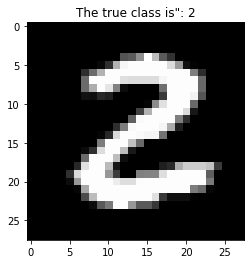

In [26]:
instance = 25
plt.imshow(np.reshape(np.array(df_train.iloc[instance,1:]), (-1,28)), cmap = 'gray')
plt.title('The true class is": %i' %df_train.iloc[instance, 0])
plt.show()

In [27]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [28]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train = df_train[df_train.columns[1:]]
y_train = df_train['label'] 
X_test = df_test[df_test.columns[1:]] 
y_test = df_test['label']


In [31]:
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
y_train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [32]:
#train a SVM with the RBF kernel

rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

SVC()

In [33]:
y_pred = rbf_svm.predict(X_test)

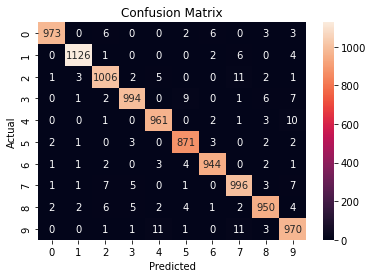

In [34]:
#compute the confusion matrix

cm = confusion_matrix(y_pred, y_test)
sb.heatmap(cm, annot = True, fmt = 'g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
#the accuracy score of the model

accuracy_score(y_pred, y_test)

0.9791

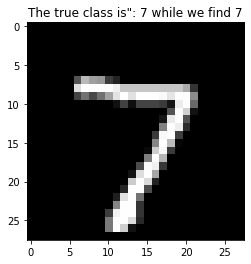

In [36]:
#have a look at a case that the model correctly classified

for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        instance = i
        break

plt.imshow(np.reshape(np.array(df_test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()

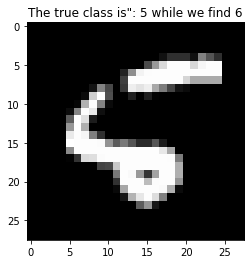

In [37]:
#have a look at a case that the model misclassified

for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        instance = i
        break
    
plt.imshow(np.reshape(np.array(df_test.iloc[instance,1:]), (-1,28)), cmap = 'gray');
plt.title('The true class is": %i while we find %i' % (y_test[instance], y_pred[instance]))
plt.show()